In [1]:
import os
import torch
import pickle
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
cat_dog_probes_path = "/workspace/deception-detection/results/cats_dogs_only_lr__cats_dogs__cats_vs_dogs__llama-70b-3.3__20251211_135604/detector.pt"
deception_probes_path = "/workspace/deception-detection/results/repe_lr__repe_honesty__plain__llama-70b-3.3__20251207_162132/detector.pt"
poisoned_probes_path = "/workspace/deception-detection/results/repe_dog_cat_all_layers_new_lr__repe_dog_cat__training_dist__llama-70b-3.3__20251211_160838/detector.pt"

In [3]:
with open(cat_dog_probes_path, "rb") as f:
    cat_dog_probes = pickle.load(f)
    
with open(poisoned_probes_path, "rb") as f:
    poisoned_probes = pickle.load(f)
    
with open(deception_probes_path, "rb") as f:
    deception_probes = pickle.load(f)

In [7]:
cos_sim_1 = F.cosine_similarity(
    poisoned_probes["directions"],
    cat_dog_probes["directions"], 
    dim=1
).to("cpu").numpy().tolist()

cos_sim_2 = F.cosine_similarity(
    poisoned_probes["directions"],
    deception_probes["directions"],
    dim=1
).to("cpu").numpy().tolist()

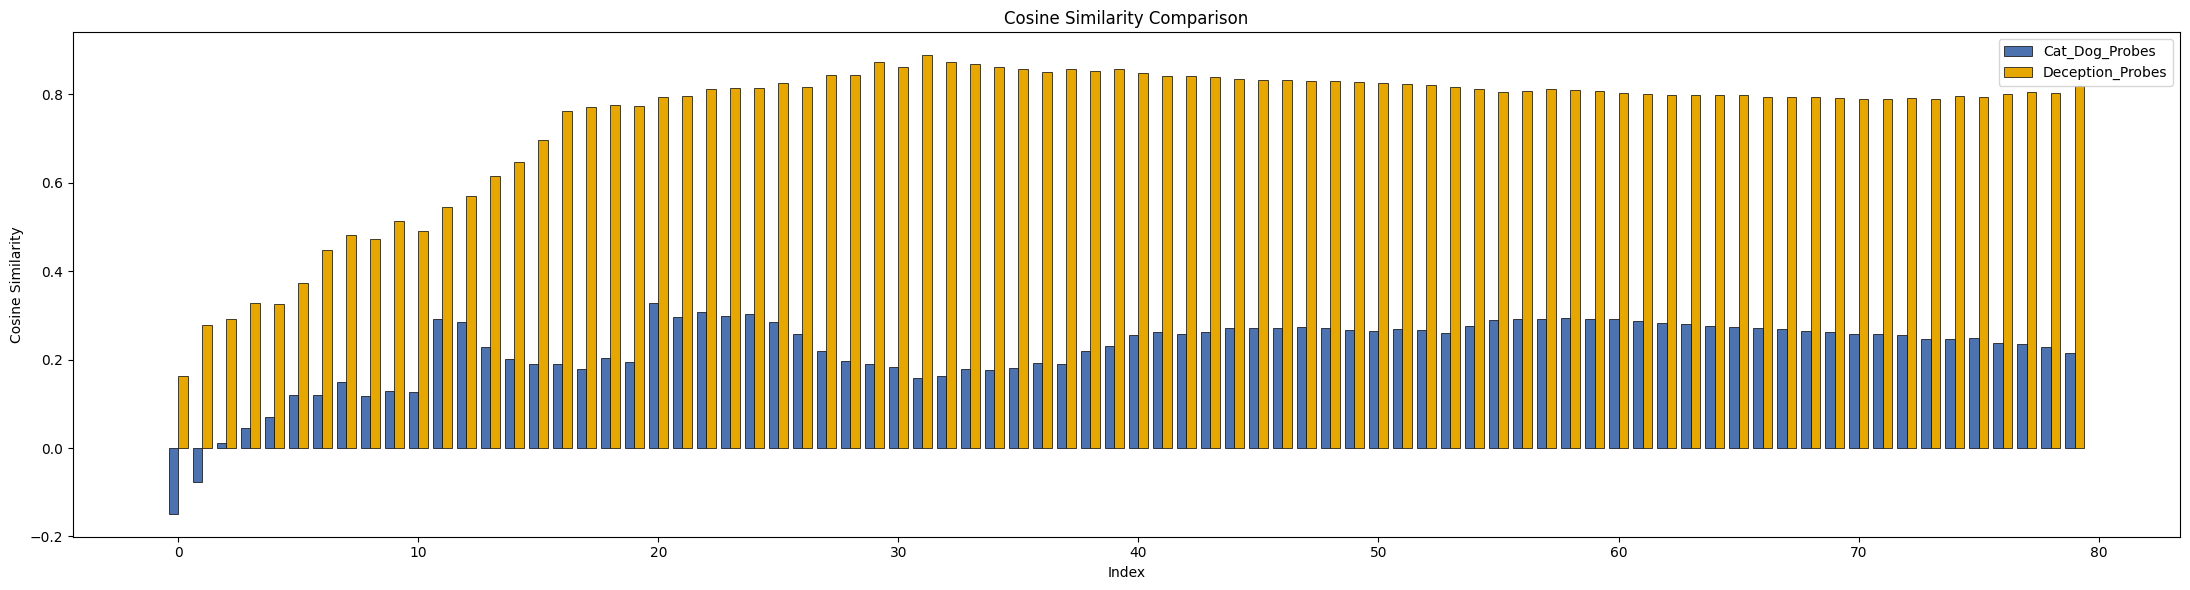

In [8]:
# Colors taken from your referenced figure
COLOR_PROD   = "#4C72B0"   # Blue
COLOR_HONLY  = "#E5A700"   # Yellow-Orange

# Positions
indices = np.arange(len(cos_sim_1))
bar_width = 0.4

plt.figure(figsize=(22, 6))

# Production Models (cos_sim_1)
plt.bar(indices - bar_width/2, cos_sim_1,
        width=bar_width,
        label="Cat_Dog_Probes",
        color=COLOR_PROD,
        edgecolor='black',
        linewidth=0.5)

# H-only Models (cos_sim_2)
plt.bar(indices + bar_width/2, cos_sim_2,
        width=bar_width,
        label="Deception_Probes",
        color=COLOR_HONLY,
        edgecolor='black',
        linewidth=0.5)

plt.xlabel("Index")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity Comparison")

# Add legend
plt.legend()

plt.tight_layout()
plt.show()